# Using ConceptNet to get similarity between two concepts

## Setting

In [92]:
import requests
import numpy as np
import os
import glob
import pandas as pd

curfolder = os.getcwd()
answerfolder = curfolder + '/answer_data/'
answerfiles = glob.glob(answerfolder + '*.csv')

# load in one file
df = pd.read_csv(answerfiles[0])
# add a column exp and set values everywhere to 1 - tp keep track what part is it
df['exp'] = 1
df2 = pd.read_csv(answerfiles[1])
df2['exp'] = 2

# concept list
df_concepts = pd.read_excel(answerfolder + '/conceptlist_info.xlsx')

## Preparing dataframe

In [93]:

# merge df and df 2
df_all = pd.concat([df, df2], ignore_index=True)

# keep only columns word and answer
df = df_all[['word', 'answer', 'exp']]

# in df_concepts, keep only English and Dutch
df_concepts = df_concepts[['English', 'Dutch']]

# rename Dutch to word
df_concepts = df_concepts.rename(columns={'Dutch': 'word'})

# merge df and df_concepts on word
df = pd.merge(df, df_concepts, on='word', how='left')

# show rows where English is NaN
df[df['English'].isnull()]

# add translations manually for each
df.loc[df['word'] == 'bloem', 'English'] = 'flower'
df.loc[df['word'] == 'dansen', 'English'] = 'to dance'
df.loc[df['word'] == 'auto', 'English'] = 'car'
df.loc[df['word'] == 'olifant', 'English'] = 'elephant'
df.loc[df['word'] == 'comfortabel', 'English'] = 'comfortable'
df.loc[df['word'] == 'bal', 'English'] = 'ball'
df.loc[df['word'] == 'haasten', 'English'] = 'to hurry'
df.loc[df['word'] == 'gek', 'English'] = 'crazy'
df.loc[df['word'] == 'snijden', 'English'] = 'to cut'
df.loc[df['word'] == 'koken', 'English'] = 'to cook'
df.loc[df['word'] == 'juichen', 'English'] = 'to cheer'
df.loc[df['word'] == 'zingen', 'English'] = 'to sing'
df.loc[df['word'] == 'glimlach', 'English'] = 'smile'
df.loc[df['word'] == 'klok', 'English'] = 'clock'
df.loc[df['word'] == 'fiets', 'English'] = 'bicycle'
df.loc[df['word'] == 'vliegtuig', 'English'] = 'airplane'
df.loc[df['word'] == 'geheim', 'English'] = 'secret'
df.loc[df['word'] == 'telefoon', 'English'] = 'telephone'
df.loc[df['word'] == 'zwaaien', 'English'] = 'to wave'
df.loc[df['word'] == 'sneeuw', 'English'] = 'snow'

# in col English, replace 'to ' with ''
df['English'] = df['English'].str.replace('to ', '')

# make a list of English meanings
meanings_en = list(df['English'])
len(meanings_en)

meanings_nl = list(df['word'])

# make a list of Dutch meanings
answers_nl = list(df['answer'])
answers_nl
len(answers_nl)

# make a list of English answers
answers_en = ['party', 'to cheer', 'tasty', 'to shoot', 'to breathe', 'zombie', 'bee', 'sea', 'dirty', 'tasty', 'car', 'to eat', 'to eat', 'to blow', 'hose', 'hose', 'to annoy', 'to make noise', 'to make noise', 'to run away', 'elephant', 'to cry', 'cold', 'outfit', 'silence', 'to ski', 'wrong', 'to play basketball', 'to search', 'disturbed', 'to run', 'to lick', 'to lift', 'lightning', 'to think', 'to jump', 'to fall', 'to write', 'to dance', 'shoulder height', 'horn', 'dirty', 'boring', 'to drink', 'strong', 'elderly', 'to mix', 'fish', 'fish', 'dirty', 'wrong', 'smart', 'to box', 'to box', 'dog', 'to catch', 'to cheer', 'to sing', 'pregnant', 'hair', 'to shower', 'pain', 'burnt', 'hot', 'I', 'to chew', 'bird', 'airplane', 'to fly', 'to think', 'to choose', 'to doubt', 'graffiti', 'fireworks', 'bomb', 'to smile', 'to laugh', 'smile', 'clock', 'to wonder', 'height', 'big', 'height', 'space', 'to misjudge', 'to wait', 'satisfied', 'happy', 'fish', 'to smell', 'wind', 'pain', 'to burn', 'hot', 'to cycle', 'to fly', 'airplane', 'bird', 'to crawl', 'to drink', 'waterfall', 'water', 'fire', 'top', 'good', 'to hear', 'to point', 'distance', 'there', 'to whisper', 'quiet', 'to be silent', 'telephone', 'to blow', 'to distribute', 'to give', 'cat', 'to laugh', 'tasty', 'to eat', 'yummy', 'to sleep', 'mountain', 'dirty', 'to vomit', 'to be disgusted', 'to greet', 'hello', 'goodbye', 'to smell', 'nose', 'odor', 'to fly', 'fireworks', 'to blow', 'to cut', 'pain', 'hot', 'to slurp', 'to throw', 'to fall', 'to fall', 'whistle', 'heartbeat', 'mouse', 'to hit', 'to catch', 'to grab', 'to throw', 'to fall', 'to shoot', 'circus', 'trunk', 'to fall', 'to fight', 'pain', 'to push open', 'to growl', 'to cut', 'to eat', 'knife', 'to slurp', 'to drink', 'drink', 'to eat', 'delicious', 'tasty', 'to cough', 'sick', 'to cry', 'to cry']
# replace 'to ' with ''
answers_en = [x.replace('to ', '') for x in answers_en]

len(answers_en)

# add those to df as answers_en
df['answer_en'] = answers_en

NOTE THAT SOMETIMES IT RESULTS IN SAME RATING FOR TWO DIFFERENT ANSWER IN NOUN/VERB - drink-to drink BECAUSE TO IS NOT IN THE EMBEDDING LEMMA

## ConceptNet API

In [94]:
def get_concept_data(concept):
    url = f"http://api.conceptnet.io/c/en/{concept}"
    response = requests.get(url).json()
    
    # Parse the JSON data and extract useful information
    for edge in response['edges']:
        print(f"Relation: {edge['rel']['label']}")
        print(f"Start: {edge['start']['label']}")
        print(f"End: {edge['end']['label']}")
        print(f"Weight: {edge['weight']}\n")

# Search for the concept 
get_concept_data('drink/v')


KeyboardInterrupt: 

## Similarity using numberbatch

In [ ]:
# Load embeddings from a file

def load_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Cosine similarity
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)

# Euclidian distance
def euclidean_distance(vec1, vec2):
    return np.linalg.norm(vec1 - vec2)



In [ ]:
# Load embeddings
embeddings = load_embeddings('numberbatch.txt') # downloaded from https://github.com/commonsense/conceptnet-numberbatch?tab=readme-ov-file


KeyboardInterrupt: 

In [96]:
from gensim.models import KeyedVectors

# Load ConceptNet Numberbatch embeddings
model_path = "numberbatch.txt"
numberbatch = KeyedVectors.load_word2vec_format(model_path, binary=False)

# Fetch embeddings for "drink" (noun) and "drink" (verb)
drink_noun = numberbatch.get_vector('/c/en/drink/n')
drink_verb = numberbatch.get_vector('/c/en/drink/v')

# Calculate cosine similarity
cosine_similarity = numberbatch.similarity('/c/en/drink/n', '/c/en/drink/v')

MemoryError: Unable to allocate 10.2 GiB for an array with shape (9161912, 300) and data type float32

In [ ]:
# Load embeddings
embeddings_en = load_embeddings('numberbatch-en.txt') # downloaded from https://github.com/commonsense/conceptnet-numberbatch?tab=readme-ov-file


In [ ]:
# Get the vectors for the concepts
vec_dog = embeddings.get('en/drink')
vec_cat = embeddings.get('en/drink')

# Check if embeddings exist for both words
if vec_dog is not None and vec_cat is not None:
    # Calculate similarity and distance
    cosine_sim = cosine_similarity(vec_dog, vec_cat)
    euclidean_dist = euclidean_distance(vec_dog, vec_cat)
    print(f"Cosine Similarity: {cosine_sim}")
    print(f"Euclidean Distance: {euclidean_dist}")
else:
    print("One or both concepts not found in the embeddings.")


## Embeddings for concepts and answers

In [ ]:
# get the embeddings for the words in the list meanings_en
word_embeddings_en = {}
for word in meanings_en:
    if word in embeddings:
        word_embeddings_en[word] = embeddings[word]

# get the embeddings for the words in the list answers_en
word_embeddings_ans = {}
for word in answers_en:
    if word in embeddings:
        word_embeddings_ans[word] = embeddings[word]

# calculate the similarity between the first word in the list meanings_en and first word in answers_en, second word in meanings_en and second word in answers_en, etc.
cosine_similarities = []
euclidean_distances = []

for i in range(len(meanings_nl)):
    word1 = meanings_nl[i]
    word2 = answers_nl[i]
    vec1 = word_embeddings_en.get(word1)
    vec2 = word_embeddings_ans.get(word2)
    if vec1 is not None and vec2 is not None:
        cosine_sim = cosine_similarity(vec1, vec2)
        euclidean_dist = euclidean_distance(vec1, vec2)
        cosine_similarities.append(cosine_sim)
        euclidean_distances.append(euclidean_dist)
    else:
        cosine_similarities.append(None)
        euclidean_distances.append(None)


In [ ]:
import conceptnet.vectors as cnv



In [ ]:
cosine_similarities

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [ ]:
word_embeddings_en

{'flower': array([ 1.470e-02,  1.129e-01,  2.265e-01,  1.780e-02, -1.506e-01,
         1.079e-01,  1.775e-01,  7.930e-02,  1.937e-01, -1.618e-01,
        -9.710e-02, -1.144e-01,  1.400e-02, -4.220e-02, -2.210e-02,
         5.180e-02, -9.400e-03, -2.801e-01, -1.211e-01,  9.410e-02,
         1.764e-01, -1.327e-01,  4.030e-02,  7.440e-02, -1.721e-01,
         7.950e-02, -9.870e-02, -8.280e-02,  5.010e-02, -1.069e-01,
        -1.420e-01,  8.000e-03,  4.820e-02,  3.950e-02, -6.460e-02,
         8.930e-02,  2.080e-02, -5.700e-03, -5.810e-02, -5.060e-02,
        -1.880e-02,  1.976e-01,  2.060e-02, -4.170e-02,  2.110e-02,
        -7.670e-02,  1.420e-02,  9.500e-03,  2.680e-02, -3.270e-02,
        -3.050e-02,  1.720e-02, -2.450e-02,  6.400e-03, -3.970e-02,
        -1.005e-01,  4.420e-02,  1.880e-02,  5.050e-02,  1.240e-01,
        -2.050e-02,  5.000e-04, -9.920e-02,  4.400e-03, -5.300e-03,
        -9.540e-02,  2.670e-02,  1.315e-01,  2.530e-02, -5.230e-02,
        -2.900e-03,  2.100e-02,  1.580

In [ ]:
## add cosine similarities and euclidean distances to df
df['cosine_similarity'] = cosine_similarities
df['euclidean_distance'] = euclidean_distances

In [ ]:
# get rid of English 'to beat'
df_final = df[df['English'] != 'beat']
# and to weep
df_final = df[df['English'] != 'weep']

In [ ]:
# save it
df_final.to_csv('conceptnet_clean.csv', index=False)

## Adding similarity survey

In [ ]:
# load in excel similarity_en_survey
df_survey = pd.read_excel(answerfolder + '/similarity_en_survey.xlsx')

# get rid of Timestamp column
df_survey = df_survey.drop(columns='Timestamp')

# for each column, calculate the mean and save it to a df
df_survey_means = pd.DataFrame(df_survey.mean()).reset_index()

# separate the index, the first part is English, the second part is the answer_en
df_survey_means['English'] = df_survey_means['index'].str.split(' - ').str[0]
df_survey_means['answer_en'] = df_survey_means['index'].str.split(' - ').str[1]

# get rid of the index column
df_survey_means = df_survey_means.drop(columns='index')

# rename the column 0 to mean_similarity
df_survey_means = df_survey_means.rename(columns={0: 'mean_similarity'})

# change to lightning into lightning
df_survey_means.loc[df_survey_means['answer_en'] == 'to lightning', 'answer_en'] = 'lightning'
# phone to telephone
df_survey_means.loc[df_survey_means['answer_en'] == 'phone', 'answer_en'] = 'telephone'
# scent to odor
df_survey_means.loc[df_survey_means['answer_en'] == 'scent', 'answer_en'] = 'odor'

In [ ]:
# replace string 'to ' with ''
df_survey_means['English'] = df_survey_means['English'].str.replace('to ', '')
# also in answer_en
df_survey_means['answer_en'] = df_survey_means['answer_en'].str.replace('to ', '')

In [ ]:
# merge df_survey_means with df on English and answer_en
df_final = pd.merge(df, df_survey_means, on=['English', 'answer_en'], how='left')

# get rid of English 'to beat'
df_final = df_final[df_final['English'] != 'beat']
# and to weep
df_final = df_final[df_final['English'] != 'weep']

In [ ]:
# show me the rows where mean_similarity is NaN
df_final[df_final['mean_similarity'].isnull()]

# mean_similarity of row where English is sharp and answer_en is pain is 4.0 (don't know why it's NaN)
df_final.loc[(df_final['English'] == 'sharp') & (df_final['answer_en'] == 'pain'), 'mean_similarity'] = 4.0

In [ ]:
df_final

,word,answer,exp,English,answer_en,cosine_similarity,euclidean_distance,mean_similarity
0,bloem,feest,1,flower,party,0.090024,1.349050,2.1
1,dansen,juichen,1,dance,cheer,0.231173,1.239996,3.6
2,bitter,lekker,1,bitter,tasty,0.282272,1.198111,3.0
3,vechten,schieten,1,fight,shoot,0.095212,1.345195,5.1
4,ademen,ademen,1,breathe,breathe,1.000000,0.000000,10.0
...,...,...,...,...,...,...,...,...
171,dik,heerlijk,2,thick,delicious,0.124208,1.323527,2.0
172,dik,lekker,2,thick,tasty,0.150678,1.303349,1.5
173,ziek,hoesten,2,sick,cough,0.281177,1.199025,6.2
174,ziek,ziek,2,sick,sick,1.000000,0.000000,10.0


## Test correlation

In [ ]:
# get rid of all lines where mean_similarity is 10.0
df_corr = df_final[df_final['mean_similarity'] != 10.0]

In [ ]:
# run a correlation between cosine_similarity and mean_similarity
df_corr['cosine_similarity'].corr(df_corr['mean_similarity'])

0.7748545593527965

In [ ]:
# run a correlation between euclidean_distance and mean_similarity
df_corr['euclidean_distance'].corr(df_corr['mean_similarity'])

-0.6986951829948619

<Axes: xlabel='cosine_similarity', ylabel='mean_similarity'>

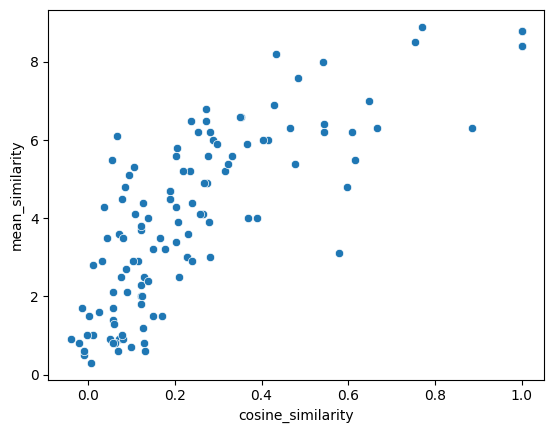

In [ ]:
# plot it
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_corr, x='cosine_similarity', y='mean_similarity')

In [ ]:
df_corr

,word,answer,exp,English,answer_en,cosine_similarity,euclidean_distance,mean_similarity
0,bloem,feest,1,flower,party,0.090024,1.349050,2.1
1,dansen,juichen,1,dance,cheer,0.231173,1.239996,3.6
2,bitter,lekker,1,bitter,tasty,0.282272,1.198111,3.0
3,vechten,schieten,1,fight,shoot,0.095212,1.345195,5.1
5,bijten,zombie,1,bite,zombie,0.084378,1.353214,4.8
...,...,...,...,...,...,...,...,...
169,zuigen,drink,2,suck,drink,0.188417,1.273987,4.5
170,dik,eten,2,thick,eat,0.059414,1.371567,1.3
171,dik,heerlijk,2,thick,delicious,0.124208,1.323527,2.0
172,dik,lekker,2,thick,tasty,0.150678,1.303349,1.5


Correlation coefficient between cosine_similarity and mean_similarity: 0.77


<Figure size 1000x600 with 0 Axes>

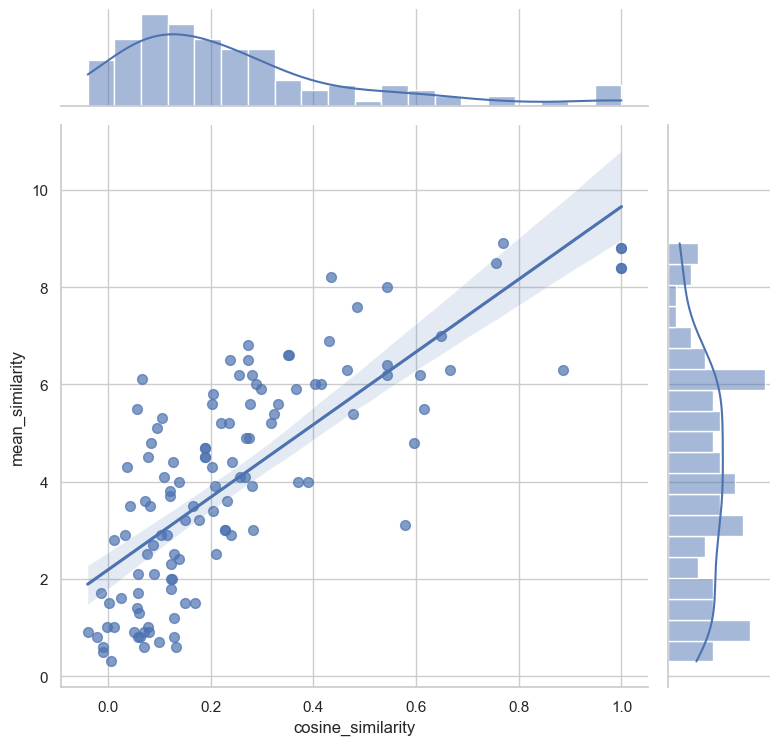

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Select the relevant subset of the data
#subdf_ges = features_df[features_df["modality"] == "gebaren"]
#df = pd.read_csv("features_df_final_with_rel.csv")

# drop gebaren modality
#subdf = df[df["modality"] != "geluiden"]
subdf = df_corr

feature1 = "cosine_similarity"
feature2 = "mean_similarity"

# Create a sub-dataframe with the selected features, dropping missing values
subdf = subdf[[feature1, feature2]].dropna()

# Compute the correlation coefficient
corr_coef, _ = pearsonr(subdf[feature1], subdf[feature2])

# Create a joint plot with scatter and marginal histograms
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Using seaborn's jointplot to create scatter plot with histograms
g = sns.jointplot(x=subdf[feature1], y=subdf[feature2], kind='reg', height=8,
                  scatter_kws={'s': 50, 'alpha': 0.7}, marginal_kws=dict(bins=20, fill=True))

# Annotate the plot with the correlation coefficient
#g.fig.suptitle(f'Correlation Coefficient: {corr_coef:.2f}', fontsize=16)
g.fig.subplots_adjust(top=0.93)  # Adjust the title position

# print correlation
print(f"Correlation coefficient between {feature1} and {feature2}: {corr_coef:.2f}")

# Customize axis labels
#g.set_axis_labels(feature1, feature2, fontsize=14)

# get rid of axis labels
#g.set_axis_labels("", "")
# Show plot
plt.show()

# save with high dpi
plot_name = f"{feature1}_vs_{feature2}_jointplot.png"
g.savefig(plot_name, dpi=300)


In [ ]:
df_final

,word,answer,exp,English,answer_en,cosine_similarity,euclidean_distance,mean_similarity
0,bloem,feest,1,flower,party,0.090024,1.349050,2.1
1,dansen,juichen,1,dance,cheer,0.231173,1.239996,3.6
2,bitter,lekker,1,bitter,tasty,0.282272,1.198111,3.0
3,vechten,schieten,1,fight,shoot,0.095212,1.345195,5.1
4,ademen,ademen,1,breathe,breathe,1.000000,0.000000,10.0
...,...,...,...,...,...,...,...,...
171,dik,heerlijk,2,thick,delicious,0.124208,1.323527,2.0
172,dik,lekker,2,thick,tasty,0.150678,1.303349,1.5
173,ziek,hoesten,2,sick,cough,0.281177,1.199025,6.2
174,ziek,ziek,2,sick,sick,1.000000,0.000000,10.0


In [ ]:
# save the df_final
df_final.to_csv(answerfolder + '/df_final_conceptnet.csv', index=False)